In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from gen_wordcloud import *

In [2]:
#read data
python = pd.read_excel('../data/Github_python.xlsx')
java = pd.read_excel('../data/Github_java.xlsx')
C = pd.read_excel('../data/Github_C.xlsx')
java_s = pd.read_excel('../data/Github_javascript.xlsx')
Cpp = pd.read_excel('../data/Github_Cpp.xlsx')
C_sharp = pd.read_excel('../data/Github_Csharp.xlsx')

In [3]:
#add a language column
python['Language'] = 'Python'
java['Language'] = 'Java'
C['Language'] = 'C'
java_s['Language'] = 'JavaScript'
Cpp['Language'] = 'C++'
C_sharp['Language'] = 'C#'

In [4]:
#concat to one DataFrame and save a new file
data = pd.concat([python, java, C, java_s, Cpp, C_sharp], axis = 0, ignore_index = True)
data = data.sort_values('Stars')
data.to_excel('../data/Github_all.xlsx')
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.set_index('Full Name')
data.shape

(6120, 11)

In [5]:
#print some basic statistic information 
data['Stars'].describe()

count      6120.000000
mean       4925.611765
std        8055.872840
min         535.000000
25%        1464.000000
50%        2960.000000
75%        5120.000000
max      307351.000000
Name: Stars, dtype: float64

In [6]:
#select rows with stats >= mean value
data = data[data['Stars'] >= data['Stars'].mean()]
data = data.sort_values(by = 'Stars', ascending = False)
data.shape

(1659, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, freeCodeCamp/freeCodeCamp to tkarras/progressive_growing_of_gans
Data columns (total 11 columns):
Description        1656 non-null object
Stars              1659 non-null int64
Forks              1659 non-null int64
Created Time       1659 non-null object
Size               1659 non-null int64
Owner Type         1659 non-null object
Owner Location     1020 non-null object
Owner Followers    1659 non-null int64
Repo_num           1659 non-null int64
Company            393 non-null object
Language           1659 non-null object
dtypes: int64(5), object(6)
memory usage: 155.5+ KB


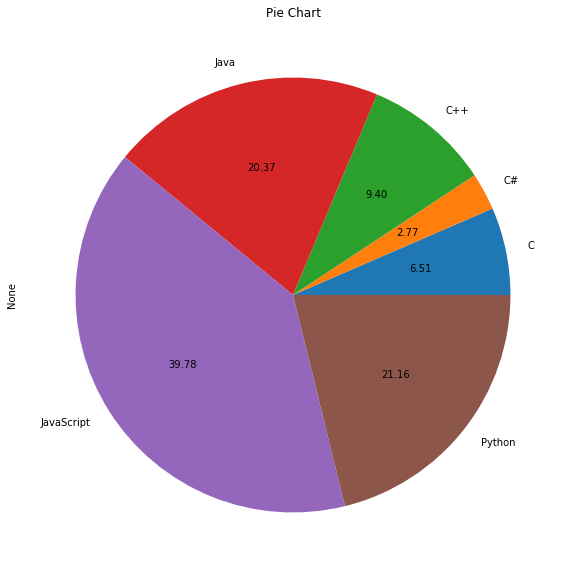

In [8]:
#draw pie chart
x  = data.groupby('Language').apply(len)
plt.figure(figsize = (10, 10))
x.plot(kind = 'pie', subplots = True, autopct = '%.2f')
plt.title('Pie Chart')
plt.savefig('../picture/pie.png')
plt.show()

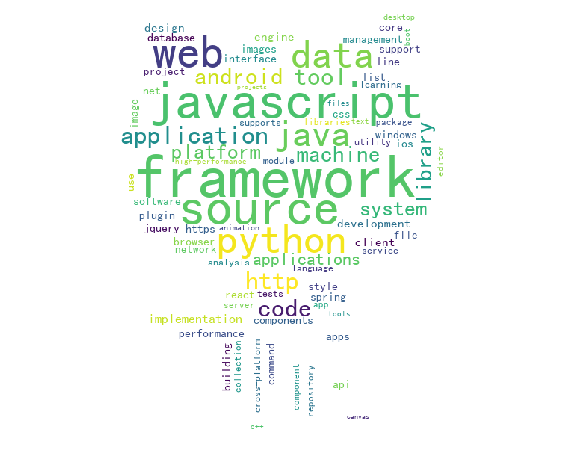

In [9]:
#generate wordcloud
plt.figure(figsize = (10,10))
wordcloud = gen_wordcloud(data.reset_index())
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('../picture/wordcloud_all.jpg')


In [10]:
data

,Description,Stars,Forks,Created Time,Size,Owner Type,Owner Location,Owner Followers,Repo_num,Company,Language
Full Name,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,The https://www.freeCodeCamp.org open source c...,307351,23326,2014-12-24,121852,Organization,Just here on Earth... for now,0,126,NaN,JavaScript
tensorflow/tensorflow,An Open Source Machine Learning Framework for ...,138748,78980,2015-11-07,456557,Organization,NaN,0,86,NaN,C++
twbs/bootstrap,"The most popular HTML, CSS, and JavaScript fra...",137529,67652,2011-07-29,150022,Organization,San Francisco,0,22,NaN,JavaScript
d3/d3,"Bring data to life with SVG, Canvas and HTML. ...",88992,21628,2010-09-27,41490,Organization,"San Francisco, CA",0,52,NaN,JavaScript
CyC2018/CS-Notes,:books: 技术面试必备基础知识、Leetcode、计算机操作系统、计算机网络、系统设计...,85486,27435,2018-02-13,111417,User,"Guangzhou, China",8919,17,@ByteDance,Java
...,...,...,...,...,...,...,...,...,...,...,...
liuwons/wxBot,Python网页微信API,4933,1635,2016-02-12,1291,User,"Shanghai, China",275,19,Fudan University,Python
surmon-china/vue-quill-editor,🍡@quilljs editor component for @vuejs,4932,799,2016-12-15,8173,User,"Shanghai, China",1901,45,NaN,JavaScript
JeremySkinner/FluentValidation,A popular .NET validation library for building...,4932,796,2009-12-20,18144,User,UK,482,48,@FreelyGive,C#


In [37]:
data_loc = data[data['Owner Location'] != 'NaN']
data_loc.to_excel('../data/Github_loc.xlsx')
data_comp = data[data['Company'] != 'NaN']
data_comp.to_excel('../data/Github_comp.xlsx')

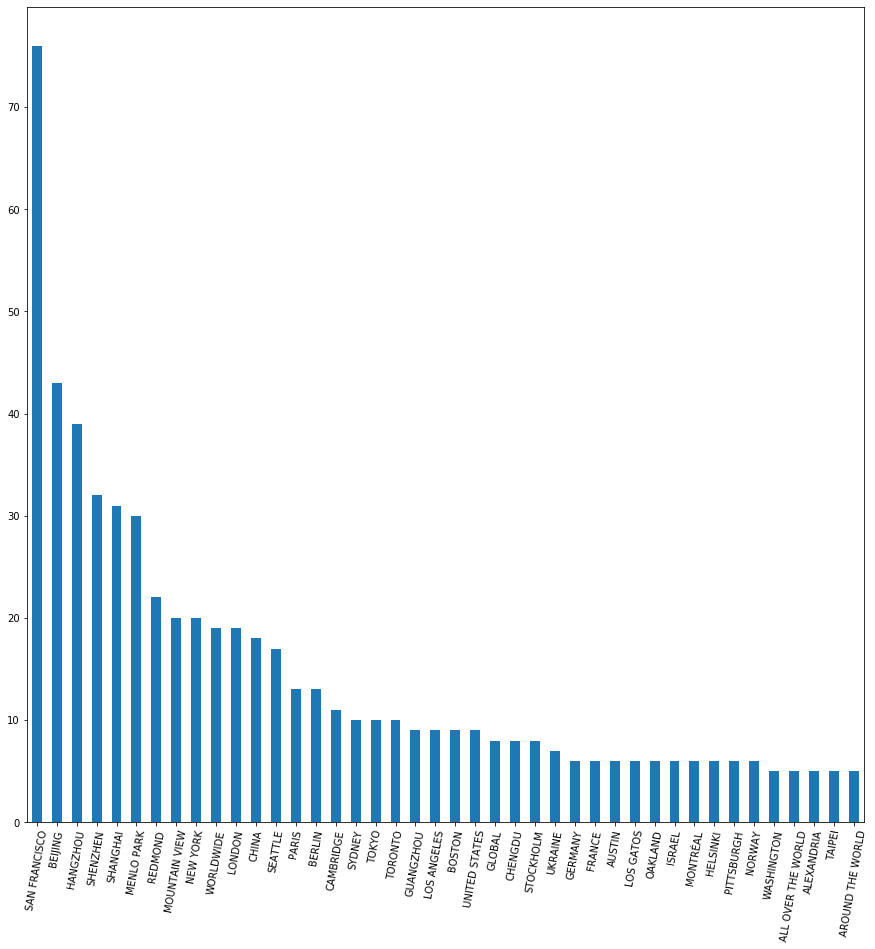

PRC                       1
PORTO ALEGRE              1
POLAND                    1
PKG.DEVDEPENDENCIES       1
PISA / TUSCANY / ITALY    1
OXFORD                    1
ODESSA                    1
OAKLAND CA                1
NYC + PARIS               1
NYC                       1
NUREMBERG                 1
NPM INSTALL WEBTORRENT    1
NOTTINGHAM                1
NOT SAN FRANCISCO         1
NEW ZEALAND               1
NEW LONDON                1
NEW CAIRO                 1
MÜNCHEN                   1
深圳                        1
#BORGBACKUP@FREENODE      1
dtype: int64

In [95]:
#print location information
loc = data_loc.groupby('Owner Location').apply(len)
#因为获得的位置信息格式过于凌乱，暂时没有找到很好的方法进行完整统一，只尝试进行了初步的统一
loc.index = [x.upper() for x in loc.index]
loc.index = [x.split(',')[0] for x in loc.index]
#loc['OTHERS'] = 0
loc = loc.groupby(loc.index).sum()
loc = loc.sort_values(ascending = False)
plt.figure(figsize = (15,15))
loc[loc.values >=5].plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.savefig('../picture/loc.png')
plt.show()
loc.tail(20)

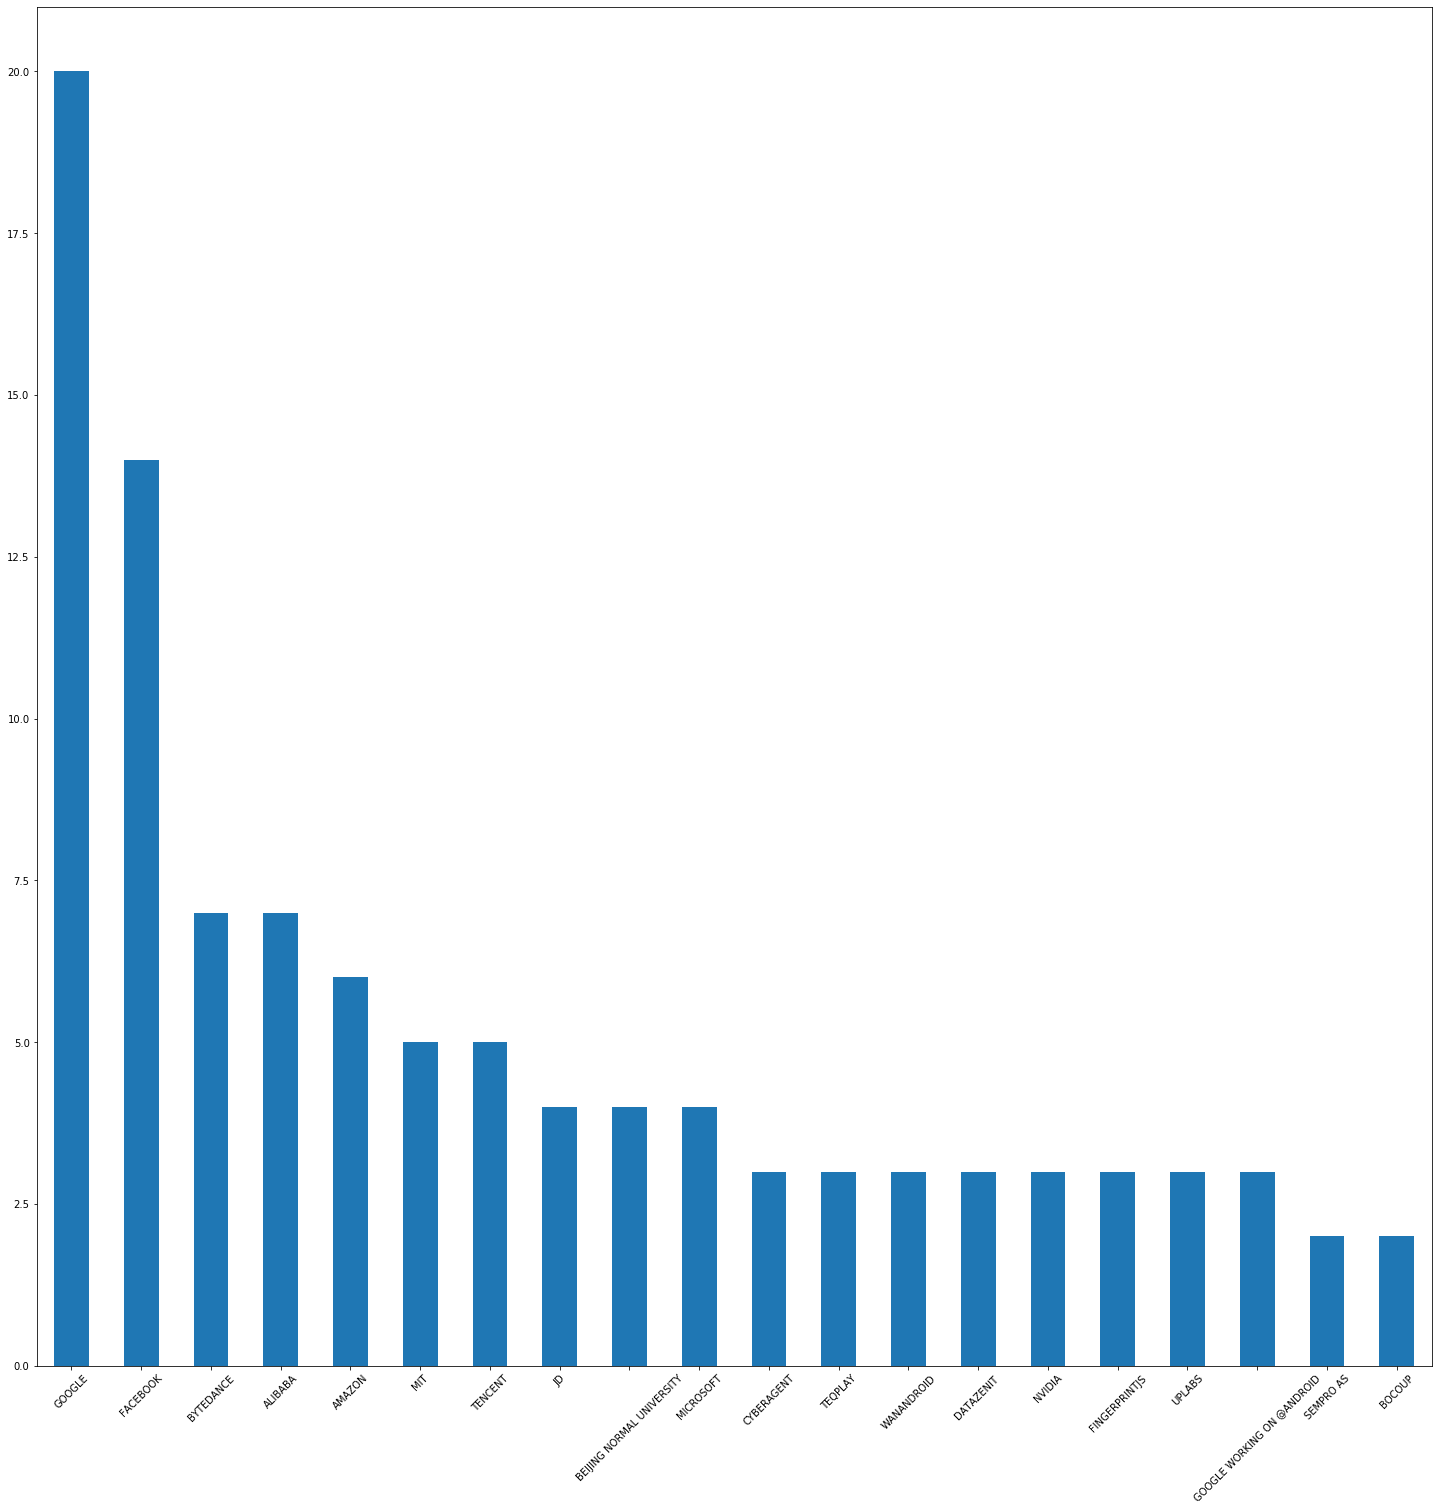

In [132]:
company = data_comp.groupby('Company').apply(len)
company.index = [x.split(',')[0].split('.')[0].strip('@').upper() for x in company.index]
company = company.groupby(company.index).sum()
company = company.sort_values(ascending = False)
plt.figure(figsize = (25, 25))
company.head(20).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.savefig('../picture/company.png')
plt.show()